First, let's import the clean data:

In [1]:
import pandas as pd

# Read data 
df = pd.read_csv('data_train.csv', header=0)

# print(X.head())

Second, let's do some Exploratory data analysis：

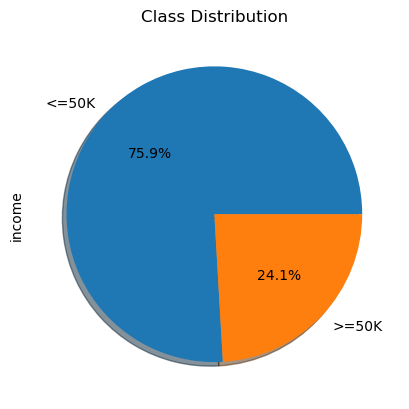

In [2]:
import matplotlib.pyplot as plt

# Using pie charts to count the number and proportion of positive and negative samples
count = df.iloc[:,-1].value_counts()

count.plot(kind='pie', labels=['<=50K', '>=50K'], autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution')
plt.show()

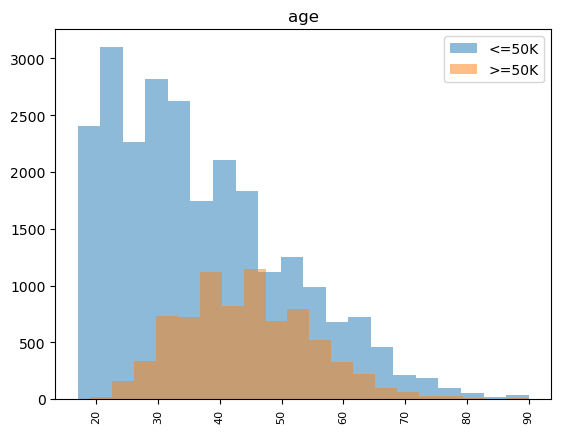

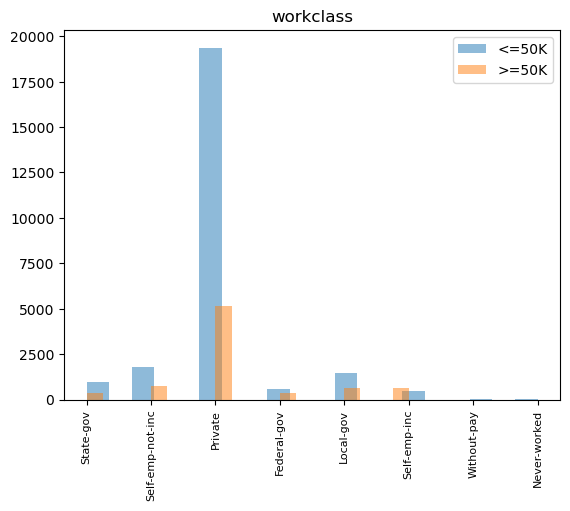

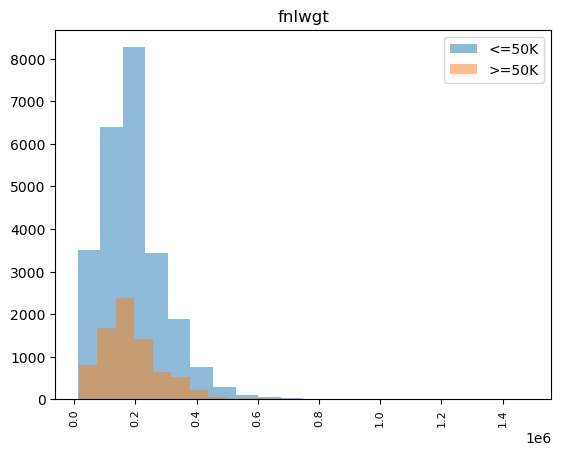

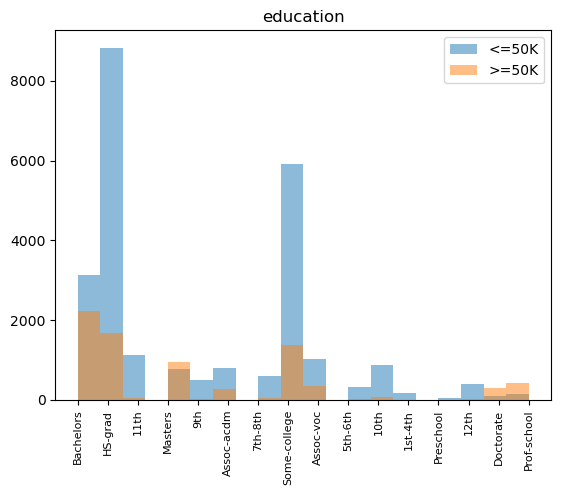

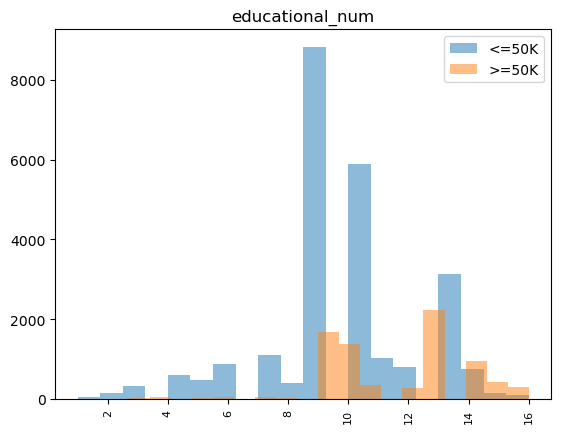

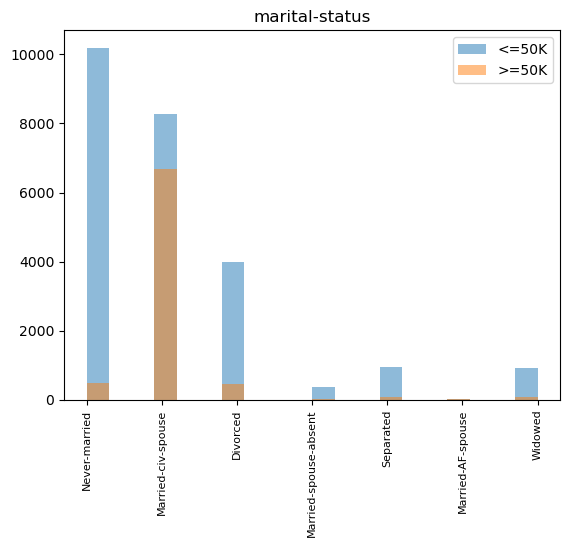

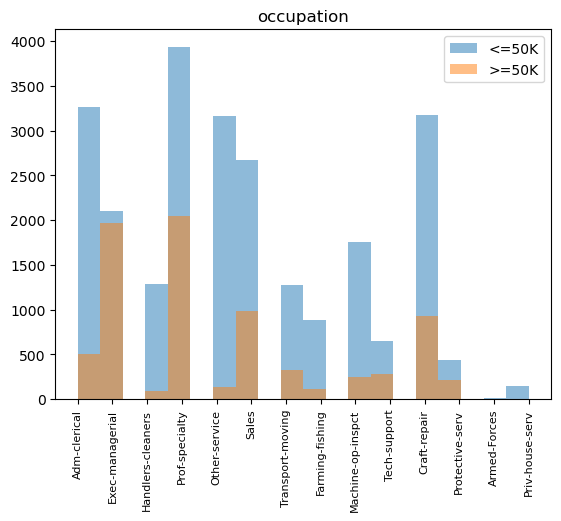

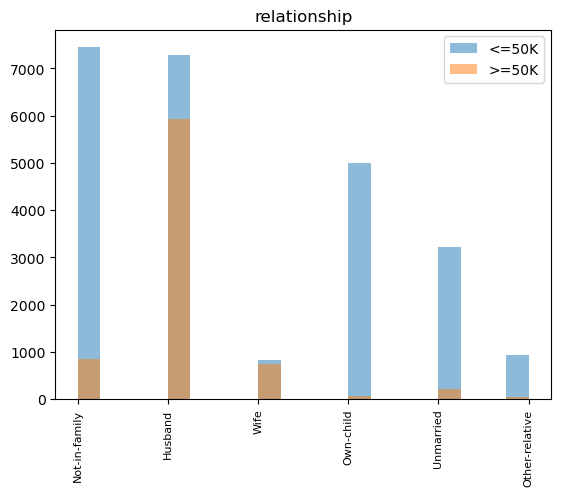

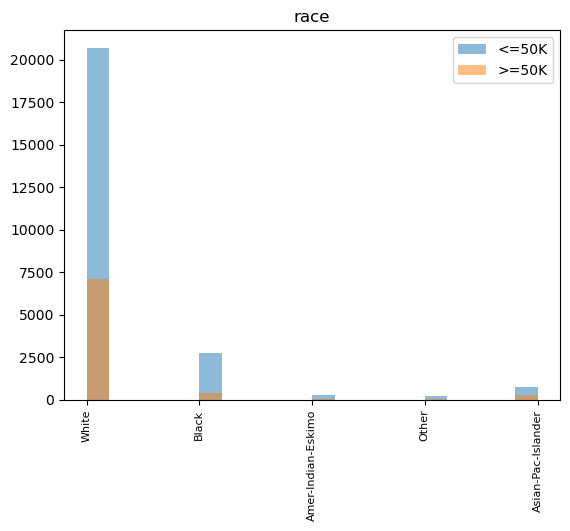

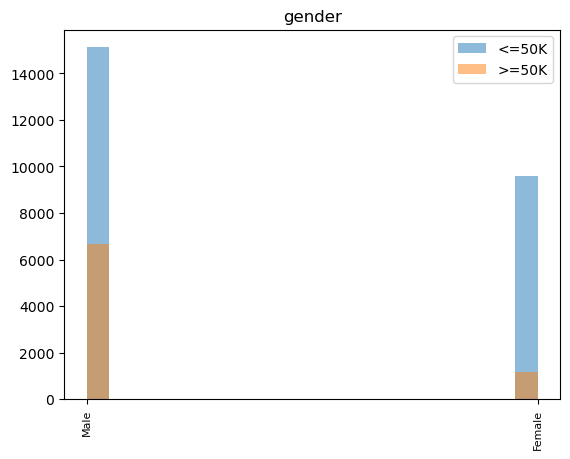

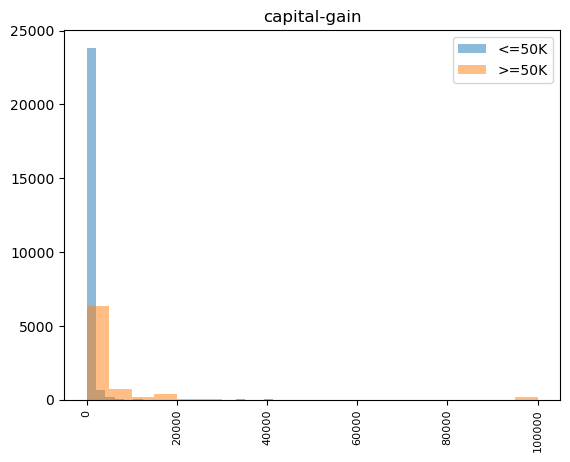

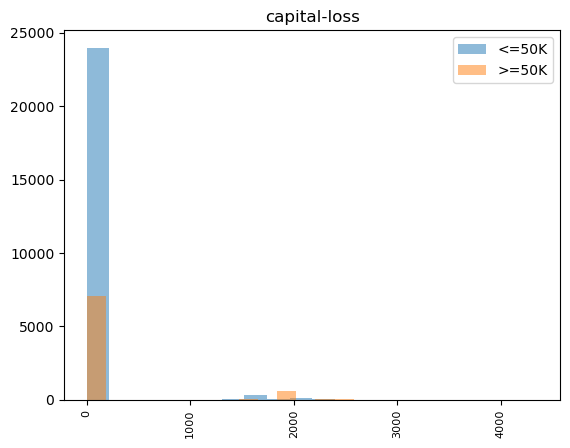

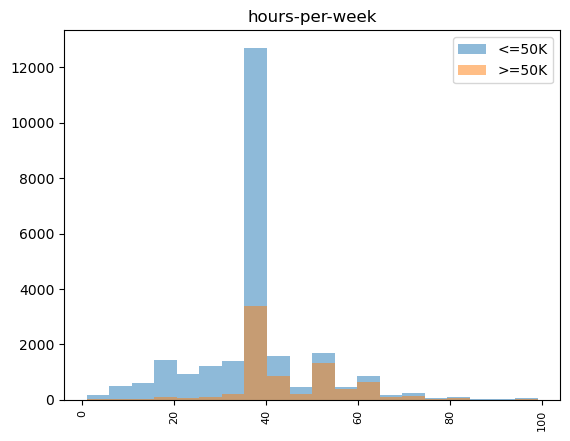

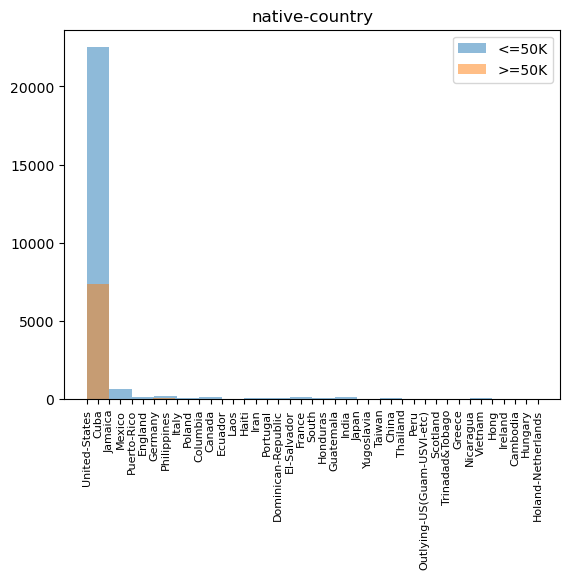

In [3]:
# Plot the histogram of each feature：
for feature in df.columns:
    if feature == 'income':
        continue
    plt.hist(df[df['income'] == 0][feature], bins=20, alpha=0.5, label='<=50K')
    plt.hist(df[df['income'] == 1][feature], bins=20,alpha=0.5, label='>=50K')
    plt.legend(loc='upper right')
    plt.title(feature)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()


C:\Users\Xinyi Liu\AppData\Local\Temp\ipykernel_25044\2172967636.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


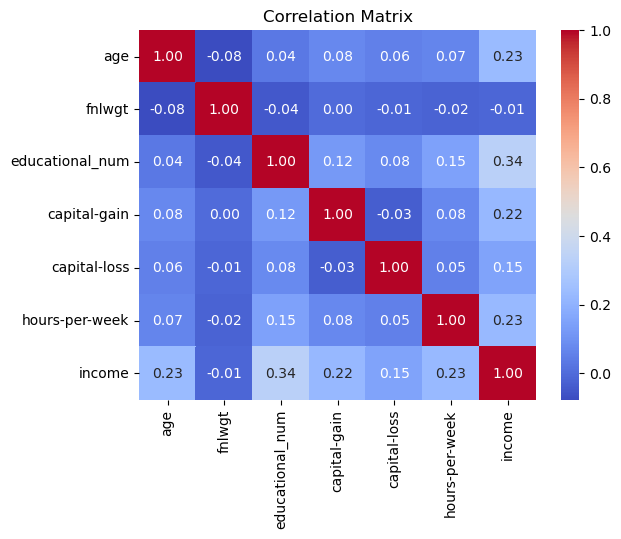

In [4]:
import seaborn as sns

# Calculate the correlation coefficient and plot the heat map
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

At the end of the exploratory data analysis, we have become familiar with the basic characteristics of the data. Next, we can start training the model.
Before training the model a data type conversion is required to encode string type variables into numeric variables, which is done by the LabelEncoder function of the sklearn package.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
encoder = LabelEncoder()

for col in df:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col].astype(str))

df

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


After the encoding is complete, the “fnlwgt” columns need to be feature scaled so that the columns are of essentially the same order of magnitude. The min-max scaling method is used here

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Feature scaling
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.857143,0.044302,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95,0.0
1,0.452055,0.714286,0.048238,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95,0.0
2,0.287671,0.428571,0.138113,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95,0.0
3,0.493151,0.428571,0.151068,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95,0.0
4,0.150685,0.428571,0.221488,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.10,0.0


In [7]:
# Use the first 80% of the dataset as the training dataset and the last 20% as the valid dataset
split_idx = int(len(df) * 0.8)

df_train = df[:split_idx]
df_valid = df[split_idx:]

After data pre-processing, the model is trained using L1 regularization to find the best subset of features for the model:

In [8]:

from sklearn.linear_model import LogisticRegression

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1] 

# Instantiate the classifier and set the corresponding hyperparameters
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=0)

# Train the model using L1 regularization and select the best subset of features
clf.fit(X_train, y_train)


# Print the column names of the best feature subset
best_features = []
for i in range(len(X_train.columns)):
    if clf.coef_[0, i] != 0:
        best_features.append(X_train.columns[i]) 

print(best_features)


['age', 'workclass', 'education', 'educational_num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']


It can be seen that the best feature subset original feature subset is consistent. So the original data can be directly used to train the model.
Next, the test set is imported and the same data transformation and feature scaling are performed to start preparing the training model

In [9]:
df_test = pd.read_csv('data_test.csv', header=0)

# feature transformation
for col in df_test:
    if df_test[col].dtype == 'object':
        df_test[col] = encoder.fit_transform(df_test[col].astype(str))

# feature scaled
for col in df_test.columns:
    df_test[col] = scaler.fit_transform(df_test[[col]])

Training models using the keras framework:

In [10]:
from keras.models import Sequential
from keras.layers import Dense

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1] 
X_valid = df_valid.iloc[:, :-1]
y_valid = df_valid.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner import Objective

# define the function of building the model
def build_model(hp: HyperParameters):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(hp.Int('units_2', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hp.Int('units_3', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hp.Int('units_4', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[AUC(name='auc')])

    return model

# set Keras Tuner
tuner = RandomSearch(
    build_model,
    objective=Objective('val_auc', direction='max'), 
    max_trials=20,
    executions_per_trial=3,
    directory='output',
    project_name='hyperparameter_tuning'
)

# search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)

# get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 20 Complete [00h 02m 48s]
val_auc: 0.9089880188306173

Best val_auc So Far: 0.9110581676165262
Total elapsed time: 00h 31m 27s
INFO:tensorflow:Oracle triggered exit


Epoch 1/20
407/407 [==============================] - 4s 6ms/step - loss: 0.3864 - auc: 0.8611 - val_loss: 0.3957 - val_auc: 0.8899
Epoch 2/20
407/407 [==============================] - 2s 5ms/step - loss: 0.3443 - auc: 0.8889 - val_loss: 0.3620 - val_auc: 0.8954
Epoch 3/20
407/407 [==============================] - 2s 5ms/step - loss: 0.3397 - auc: 0.8911 - val_loss: 0.3202 - val_auc: 0.9063
Epoch 4/20
407/407 [==============================] - 2s 5ms/step - loss: 0.3371 - auc: 0.8932 - val_loss: 0.3290 - val_auc: 0.9058
Epoch 5/20
407/407 [==============================] - 2s 5ms/step - loss: 0.3363 - auc: 0.8933 - val_loss: 0.3353 - val_auc: 0.9008
Epoch 6/20
407/407 [==============================] - 2s 5ms/step - loss: 0.3333 - auc: 0.8952 - val_loss: 0.3251 - val_auc: 0.9067
Epoch 7/20
407/407 [==============================] - 2s 5ms/step - loss: 0.3305 - auc: 0.8972 - val_loss: 0.3204 - val_auc: 0.9081
Epoch 8/20
407/407 [==============================] - 2s 5ms/step - loss: 0.

In [26]:

best_units_1 = best_hyperparameters.get('units_1')
best_units_2 = best_hyperparameters.get('units_2')
best_units_3 = best_hyperparameters.get('units_3')
best_units_4 = best_hyperparameters.get('units_4')
best_learning_rate = best_hyperparameters.get('learning_rate')

print("Best units for Dense layer 1:", best_units_1)
print("Best units for Dense layer 2:", best_units_2)
print("Best units for Dense layer 3:", best_units_3)
print("Best units for Dense layer 4:", best_units_4)
print("Best learning rate for the optimizer:", best_learning_rate)



Best units for Dense layer 1: 96
Best units for Dense layer 2: 96
Best units for Dense layer 3: 192
Best units for Dense layer 4: 224
Best learning rate for the optimizer: 0.00584537223672381


In [35]:
# Model construction using optimal hyperparameters
model = tuner.hypermodel.build(best_hyperparameters)

# Train the model and store the return value in the history variable
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_valid, y_valid))

# Validate the model
test_loss, test_auc = model.evaluate(X_test, y_test)

print('Test AUC-ROC:', test_auc)

Epoch 1/40
407/407 [==============================] - 2s 3ms/step - loss: 0.3800 - auc: 0.8649 - val_loss: 0.3514 - val_auc: 0.8875
Epoch 2/40
407/407 [==============================] - 1s 3ms/step - loss: 0.3485 - auc: 0.8854 - val_loss: 0.3312 - val_auc: 0.9039
Epoch 3/40
407/407 [==============================] - 1s 3ms/step - loss: 0.3396 - auc: 0.8915 - val_loss: 0.3332 - val_auc: 0.9016
Epoch 4/40
407/407 [==============================] - 1s 3ms/step - loss: 0.3350 - auc: 0.8945 - val_loss: 0.3426 - val_auc: 0.9044
Epoch 5/40
407/407 [==============================] - 1s 3ms/step - loss: 0.3319 - auc: 0.8964 - val_loss: 0.3369 - val_auc: 0.8981
Epoch 6/40
407/407 [==============================] - 1s 3ms/step - loss: 0.3308 - auc: 0.8970 - val_loss: 0.3231 - val_auc: 0.9055
Epoch 7/40
407/407 [==============================] - 1s 3ms/step - loss: 0.3284 - auc: 0.8987 - val_loss: 0.3331 - val_auc: 0.8971
Epoch 8/40
407/407 [==============================] - 1s 3ms/step - loss: 0.

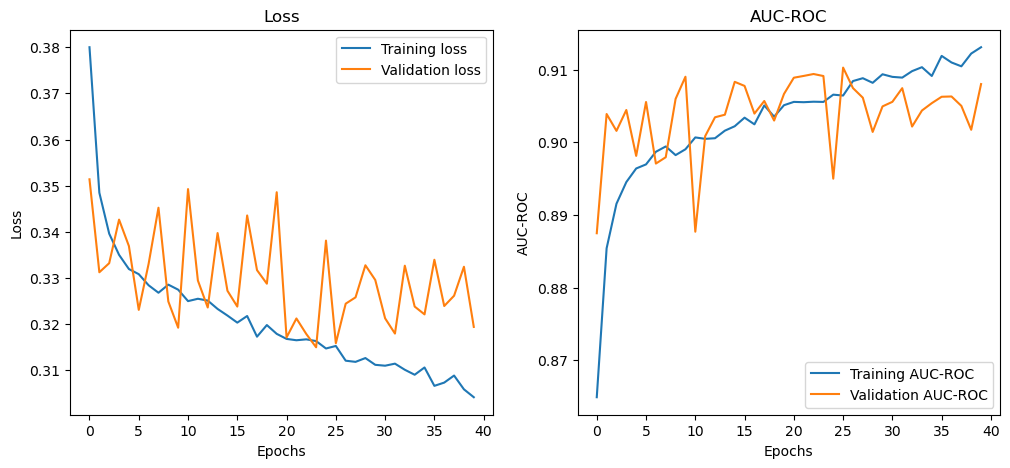

In [36]:
# Graphing Loss and AUC-ROC changes
def plot_loss_auc(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting a Loss chart
    axs[0].plot(history.history['loss'], label='Training loss')
    axs[0].plot(history.history['val_loss'], label='Validation loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plotting AUC-ROC charts
    axs[1].plot(history.history['auc'], label='Training AUC-ROC')
    axs[1].plot(history.history['val_auc'], label='Validation AUC-ROC')
    axs[1].set_title('AUC-ROC')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('AUC-ROC')
    axs[1].legend()

    plt.show()

# Calling plotting functions
plot_loss_auc(history)

Evaluate models using Accuracy, Precision, Recall and F1 scores

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# print(y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) 

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy) 


509/509 [==============================] - 1s 1ms/step
Precision: 0.6981786643538594
Recall: 0.6279251170046802
F1-score: 0.6611909650924025
Accuracy: 0.8479823106688779


Export the trained model for the next step of ensemble learning

In [38]:
model

model.save('NeuralNetwork.h5')

When you want to import the model, load_model.() should be used:

In [39]:
from tensorflow import keras

loaded_model = keras.models.load_model('NeuralNetwork.h5')